# Assignment A2 [40 marks]

The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Differentiation [10 marks]

A general $N$-point finite difference approximation of the derivative $F' \left( x \right)$ of a sufficiently smooth function $F \left( x \right)$ can be written as

$$
F' \left( x \right) \approx \frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right),
\qquad \qquad \qquad (1)
$$

with step size $\Delta x > 0$, and $\alpha_i, \beta_i \in \mathbb{Q}$, with $\beta_i \neq \beta_j$ for $i\neq j$. For example, the centred difference approximation $D_C(x)$ seen in the course has $N = 2$, and

$$
\begin{cases}
\alpha_1 = \frac{1}{2}, &\alpha_2 = -\frac{1}{2}, \\
\beta_1 = 1, &\beta_2 = -1,
\end{cases}
\qquad
\text{giving} \quad
F'(x) \approx \frac{1}{2\Delta x} \left(F\left(x + \Delta x\right) - F\left(x - \Delta x\right)\right).
$$

**1.1** Consider another finite difference approximation defined as in $(1)$, this time with $N=3$, and

$$
\begin{cases}
\alpha_1 = -\frac{4}{23}, &\alpha_2 = -\frac{9}{17}, &\alpha_3 = \frac{275}{391} \\
\beta_1 = -\frac{3}{2}, &\beta_2 = -\frac{1}{3}, &\beta_2 = \frac{4}{5}
\end{cases}.
$$

Investigate the accuracy of this approximation.

**[5 marks]**

log(error) = 1.999004920145333


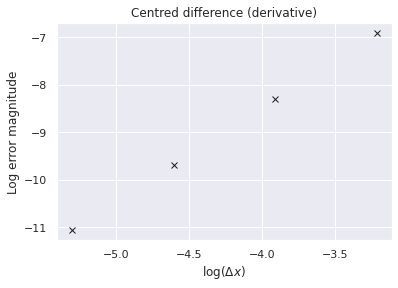

The log of the error is approximately proportional to 2 times the log of the step size
This means the approximation is second order accurate.


In [78]:
import numpy as np #(Inspired from tutorial 7)
import matplotlib.pyplot as plt

def F(x): #function for F'(x)
    return np.exp(-x ** 2)
 #I choose to use function e^(-x) to investigate accuracy
def F_Derivative(x): #function for F'(x)
    return -2.0 * (x) * F(x)

# Our given values, and range of step sizes
x = 0.5
dx = np.array([0.04, 0.02, 0.01, 0.005])
a1 = -4/23
b1 = -3/2
a2 = -9/17
b2 = -1/3
a3 = 275/391
b3 = 4/5

# Calculate the FD approximation for all step sizes at once
F_Derivative_approx = (1/dx)*(a1 * F(x+(b1*dx)) + a2 * F(x+(b2*dx)) + a3*F(x+(b3*dx)))

# Calculate the absolute error
F_Derivative_error = np.abs(F_Derivative_approx - F_Derivative(x))

# Plot the results in log-log scale
fig, ax = plt.subplots()
ax.plot(np.log(dx), np.log(F_Derivative_error), "kx")

# Label the plot
ax.set(xlabel="$\log(\Delta x)$", ylabel="Log error magnitude", title="Centred difference (derivative)")

# Compute and print the slope of the line
print('log(error) =',np.polyfit(np.log(dx), np.log(F_Derivative_error), 1)[0])

plt.show()
print('The log of the error is approximately proportional to 2 times the log of the step size')
print('This means the approximation is second order accurate.')

**1.2** For an arbitrary choice of $\beta_i$ values, what is the minimum number of points $N_{p}$ required to find an approximation $(1)$ which is at least $p$th order accurate?

*Hint:* consider the Taylor expansion of $F \left( x + \beta_i \Delta x \right)$ around $x$.

**[3 marks]**

***📝 Discussion for question 1.2***

**1.3** Using your reasoning from **1.2**, write a function `FD_coefficients()` which, given $N_p$ values $\beta_i$, returns $N_p$ coefficients $\alpha_i$ such that the approximation $(1)$ is at least $p$th order accurate.

Use your function to obtain the coefficients $\alpha_i$ from **1.1**.

**[2 marks]**


The error incurred in approximating a function by its nth-degree Taylor polynomial, is called the remainder or residual and is denoted by the function Rn(x). Taylor’s theorem can be used to obtain a bound on the size of the remainder.

In [79]:
def  FD_coefficients():    

    size= len[Beta]
    Taylor = Np[i] ** n / np.math.factorial(n) #taylor series
#I do not know how to resolve, I know the size is given from the number of elements ub Beta (in this case 3) 
# Then make equations to where i input beta values run through Taylor and can solve for output Alpha
    x = np.linalg.solve(A, B) # Solve equation using numpy

    return x
Beta = np.array([-3/2, -1/3, 4/5]) #Given beta values

#Result would be a vector so I would present results like this
print('alpha 1 =', FD_coefficients()[0])
print('alpha 2 =', FD_coefficients()[1])
print('alpha 3 =', FD_coefficients()[2])

TypeError: 'builtin_function_or_method' object is not subscriptable

---
## Question 2: Root Finding [10 marks]

Consider the following polynomial of cubic order,

$$
p(z) = z^3 + (c-1)z - c,
$$
where $c \in \mathbb{C}$.

This polynomial is complex differentiable, and we can apply Newton's method to find a complex root $z_\ast$, using a complex initial guess $z_0 = a_0 + ib_0$. In this problem, we seek to map the values of $z_0$ which lead to convergence to a root of $p$.

**2.1** Write a function `complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots)` which implements Newton's method to find roots of $p(z)$ using $N^2$ initial guesses $z_0 = a_0 + ib_0$. The input arguments are as follows:

- The real part $a_0$ of the initial guess should take `N` linearly spaced values between `amin` and `amax` (inclusive).
- The imaginary part $b_0$ of the initial guess should take `N` linearly spaced values between `bmin` and `bmax` (inclusive).
- `c` is the parameter $c \in \mathbb{C}$ in $p(z)$.
- `eps` is the tolerance $\varepsilon > 0$.
- `target_root` takes one of the following values:
    - if `target_root` is given as `None`, then convergence should be considered as achieved if Newton's method has converged to any root of $p$.
    - if `target_root` is given as a number, then convergence should only be considered as achieved if Newton's method has converged to the specific root $z_\ast =$ `target_root`.

Your function should return an array `kmax` of size $N \times N$, containing the total number of iterations required for convergence, for each value of $z_0$. You should decide what to do in case a particular value of $z_0$ doesn't lead to convergence.
    
Up to 2 marks will be given to solutions which iterate over each value of $z_0$. To obtain up to the full 4 marks, your implementation should be vectorised -- i.e. use a single loop to iterate Newton's method for all values of $z_0$ at once.

**[4 marks]**

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots):

    def P(x): #function
        return x**3 + (c - 1)* x - c
    def dPdx(x): #derivative
        return 3 * x ** 2 + (c - 1)


        c = 5
        accuracy = 1e-10

        roots = []

        x_points = np.linspace(0.0, 1.0, 200)
        y_points = P(x_points)
        for rt in roots:
            y_points /= (x_points - rt)
        y_points = np.array([ max(-1.0,min(1.0,np.real(y))) for y in y_points ])
        print(y_points)


**2.2** For $c = 0$, $a_0 \in [-5,5]$ and $b_0 \in [-5,5]$, with at least $N = 200$ values for each (you can increase $N$ if your computer allows it), use your function `complex_newton()` to calculate, for each $z_0 = a_0 + ib_0$, the total number of iterates needed to reach a disk of radius $\varepsilon$ around the root at $z = 1$. Present your results in a heatmap plot, with $a_0$ on the abscissa, $b_0$ on the ordinate and a colour map showing the total number of iterates. 

**[3 marks]**

In [69]:
#Obviously function above I could not properly solve, had it been working I would have plotted heatmap like this
import seaborn as sns; sns.set_theme()
#Using the complex_newton function and they new properties 
sns_plot = sns.heatmap(complex_newton(-5, 5, -5, 5, 0, 200, 1e-10, None ), xticklabels = 25, yticklabels = 25)


NameError: name 'complex_newton' is not defined

**2.3** For $c = 0.32 + 1.64i$, map out the points $z_0$ for which Newton's method does not converge to any root. What does it do instead?

*Hint:* Pick a point $z_0$ in a region where Newton's method does not converge and print out, say, 50 iterates. What do you observe?

**[3 marks]**

***📝 Discussion for question 2.3***
Newton's method does not always converge. Its convergence theory is for local convergence which means we should start close to the root or close relative to the specific function we are dealing with.

In this case if the function does not converge this means it has no real solution meaning a limit can't exist, so the sequence must either stop or diverge.

---
## Question 3: Numerical Integration of an ODE [20 marks]

Cardiac tissue is an example of an excitable medium, where a small stimulus can lead to a large response (a heart beat). The FitzHugh-Nagumo model describes the electrical activity of a single cardiac cell in terms of the transmembrane potential $u$ and a recovery variable $v$

\begin{align}
        \dot u & = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ , \\
        \dot v & = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
\end{align}

where $I$ (a stimulus), $\varepsilon$, $\gamma$, and $\beta$ are known parameters.

The equation for $u$ leads to fast dynamics with the possibility of excitation, while the linear term proportional to $-v$ in the equation for the recovery variable produces slower dynamics and negative feedback. The FitzHugh-Nagumo model is an example of a stiff differential equation, where the stiffness becomes more pronounced for smaller $\varepsilon$.

In questions **3.1**, **3.2**, and **3.3**, we take $\varepsilon = 0.2$, $\gamma = 0.8$, and $\beta = 0.7$.


**3.1** The fixed points, defined by $\dot u = f(u, v) = 0$ and $\dot v = g(u, v) = 0$, correspond to the state of a cell at rest. Write a function `resting_state()` to determine the values $(u_I^*, v_I^*)$ for the cell in its resting state for a given value of $I$ and a given initial guess $(u_{I, 0}, v_{I, 0})$, using Newton's method.

Use your function to compute $(u_I^*, v_I^*)$ for $I=0$ and $I = 0.5$, with initial guess $(u_{I, 0}, v_{I, 0}) = (0.2, 0.2)$.


**[5 marks]**

In [81]:
def resting_state(u0, v0, I, gamma, eps, beta):

    def f(u, v, I): #Given f function

        return (1 / eps) * (u - (u ** 3) / 3 - v + I)

    def g(u, v, gamma): #Given g function

        return  (u - gamma * v + beta) * eps

    def F(u, v, I, gamma): #combine

        return np.array([f(u, v, I), g(u, v, gamma)])
    
    def Jacobian(u, v): #jacobian matrix

        J = np.zeros([2,2]) #Initialise an array 

        #fill it with the jacobian matrix
        J[0, 0] = 1 / eps * (1 - u ** 2) #der f with respect to u
        J[1, 0] = eps #der g with respect to u
        J[0, 1] = -(1 / eps) #der f with respect to v
        J[1, 1] = -eps * gamma #der g with respect to v
        return J

    x = np.array([u0, v0]) #Initial Guess
    tol=1e-15 #low tolerance 
    while np.linalg.norm(F(x[0], x[1], I, gamma)) >= tol:
        
        # Newton iteration, tutorial 10 inspired
        e = -np.linalg.solve(Jacobian(x[0], x[1]), F(x[0], x[1], I, gamma))
        x += e
        
    return x

#Print results
print('When I = 0 values for resting state are: (',resting_state(0.2, 0.2, 0, 0.8, 0.2, 0.7)[0],') and (',resting_state(0.2, 0.2, 0, 0.8, 0.2, 0.7)[1],')')
print()
print('When I = 0.5 values for resting state are: (',resting_state(0.2, 0.2, 0.5, 0.8, 0.2, 0.7)[0],') and (',resting_state(0.2, 0.2, 0.5, 0.8, 0.2, 0.7)[1],')')
print()

When I = 0 values for resting state are: ( -1.1994080352440348 ) and ( -0.6242600440550438 )

When I = 0.5 values for resting state are: ( -0.8048477470083343 ) and ( -0.1310596837604179 )



**3.2** Using the method of your choice **\***, compute the numerical solution $(u_n, v_n) \approx (u(n\Delta t), v(n\Delta t)), n=0, 1, 2, \dots$ for the FitzHugh-Nagumo model.

You should compute the solution for both $I = 0$ and $I = 0.5$, starting at time $t = 0$ until at least $t = 100$, with $(u_0 = 0.8, v_0 = 0.8)$ as the initial condition.

Present your results graphically by plotting

(a) $u_n$ and $v_n$ with **time** (not time step) on the x-axis,  
(b) $v_n$ as a function of $u_n$. This will show what we call the solution trajectories in *phase space*.

You should format the plots so that the data presentation is clear and easy to understand.

Given what this mathematical model describes, and given that $I$ represents a stimulus, how do you interpret your results for the two different values of $I$? Describe your observations in less than 200 words.


**\*** You may use e.g. the forward Euler method seen in Week 7 with a small enough time step, or use one of the functions provided by the `scipy.integrate` module, as seen in Quiz Q4.


**[7 marks]**

In [67]:
import numpy as np
from matplotlib import pyplot as plt

x0 = 0.8
y0 = 0.8
xf = 10
n = 101
initial = np.array[(0.8,0.8)]
deltax = (xf−x0)/(n−1)
x = np.linspace(x0,xf,n)
y = np. zeros ([n]) y[0] = y0
for i in range(1,n):
y[i] = deltax∗(−y[i−1] + np.sin(x[i−1])) + y[i−1]
for i in range(n): print(x[ i ] ,y[ i ])
    
plt . plot(x,y, ’o’)
plt.xlabel(”Value of x”)
plt.ylabel(”Value of y”)
plt.title(”Approximate Solution with Forward Euler’s Method”) plt .show()

SyntaxError: invalid character in identifier (<ipython-input-67-6d2bd0f256d1>, line 9)

***📝 Discussion for question 3.2***

**3.3** Compute the eigenvalues of the Jacobi matrix
        
$$
\large
\begin{pmatrix}
    \frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\ 
    \frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{pmatrix}_{u = u_I^*, v = v_I^*}
$$

evaluated at the fixed points $u = u_I^*, v = v_I^*$, for $I = 0$ and $I = 0.5$. What do you observe?

*You may use NumPy built-in functions to compute eigenvalues.*


**[3 marks]**

In [82]:

    
# I = 0
I_0 = Jacobian(resting_state(0.2, 0.2, 0, 0.8, 0.2, 0.7)[0], resting_state(0.2, 0.2, 0, 0.8, 0.2, 0.7)[1])
eigenvalue_A = np.linalg.eig(I_0)[0] #Using numpy to compute

# I = 0.5
I_half = Jacobian(resting_state(0.2, 0.2, 0.5, 0.8, 0.2, 0.7)[0], resting_state(0.2, 0.2, 0.5, 0.8, 0.2, 0.7)[1])

eigenvalue_B = np.linalg.eig(I_half)[0] #Using numpy to compute
# Print results
print()
print('When I = 0 eigenvalue = (',eigenvalue_A[0],',',eigenvalue_A[1],')')
print()
print('When I = 0.5 eigenvalue = (',eigenvalue_B[0],',',eigenvalue_B[1],')')


When I = 0 eigenvalue = ( -1.3585719787774577 , -0.9943261962623214 )

When I = 0.5 eigenvalue = ( (0.8005502603390207+0.27810644969622556j) , (0.8005502603390207-0.27810644969622556j) )


***📝 Discussion for question 3.3***

The stability of typical equilibria of smooth ODEs is determined by the sign of real part of eigenvalues of the Jacobian matrix, an equilibrium is asymptotically stable if all eigenvalues have negative real parts; it is unstable if at least one eigenvalue has positive real part.

In this case altough our first eigenvalue does have all negative real parts, our second eigenvalue does not. This means our equlibrium here is unstable 

**3.4** For this question, we set $I = 0$ and $\gamma = 5$.

(a) Use the function `resting_state()` you wrote for **3.1** to find three fixed points, $(u_{(0)}^*, v_{(0)}^*)$, $(u_{(1)}^*, v_{(1)}^*)$ and $(u_{(2)}^*, v_{(2)}^*)$, using the initial conditions provided in the NumPy array `uv0` below (each row of the array constitutes a pair of initial conditions for one of the three fixed points).

(b) Compute the numerical solution $(u_n, v_n), n=0, 1, 2, \dots$ using the initial condition $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$, for $\delta \in \{0, 0.3, 0.6, 1.0\}$. This simulates the activity of a cell starting at a small perturbation $\delta$ of one of its resting states, in this case $(u_{(0)}^*, v_{(0)}^*)$.

Plot your results in a similar way as in question **3.2**, and discuss your observations in less than 150 words. In particular, does the solution always return to the same fixed point, i.e. the same resting state?

**[5 marks]**

In [83]:
import numpy as np

# Initial conditions

uv0 = np.array([[0.9, 0.6],[0., 0.4], [-1.7, -0.3]])
#Part A)
print('First pair resulting fixed point = (',resting_state(uv0[0,0], uv0[0,1], 0, 5, 0.2, 0.7)[0],',',resting_state(uv0[0,0], uv0[0,1], 0, 5, 0.2, 0.7)[1],')')
print('Second pair resulting fixed point = (',resting_state(uv0[1,0], uv0[1,1], 0, 5, 0.2, 0.7)[0],',',resting_state(uv0[1,0], uv0[1,1], 0, 5, 0.2, 0.7)[1],')')
print('Third pair resulting fixed point = (',resting_state(uv0[2,0], uv0[2,1], 0, 5, 0.2, 0.7)[0],',',resting_state(uv0[2,0], uv0[2,1], 0, 5, 0.2, 0.7)[1],')')

First pair resulting fixed point = ( 1.4529016889173565 , 0.43058033778347127 )
Second pair resulting fixed point = ( 0.17732319353744583 , 0.17546463870748916 )
Third pair resulting fixed point = ( -1.6302248824548025 , -0.1860449764909605 )


***📝 Discussion for question 3.4***